In [133]:
import numpy as np
from scipy import linalg
from scipy import optimize
from tqdm import trange
import matplotlib.pyplot as plt

In [143]:
v1 = np.random.randint(low=1, high = 20, size = 100)*1.0 # Задаем диагональ нашей матрицы
A = np.diag(v1)                                          # Создаем диагональную матрицу
v2 = np.random.rand(100)                                 # Задаем 100 случайных элементов
tmp = np.diag(v2)
np.random.shuffle(tmp)                                   
A = A + tmp                                              #"Замешиваем" их в матрицу
b = np.random.rand(100)*10.0                             # Задаем вектор b
x0 = np.random.rand(100)                                 # Задаем x0

In [144]:
# Находим L и мю как максимальное и минимальное с.з. матрицы
eig_vals = linalg.eigvals(A.T @ A)
L0 = np.real(max(eig_vals))
mu = np.real(min(eig_vals))

In [145]:
def grad(x):
    """Возвращает градиент LS"""
    return A.T @ (A @ x - b)
def hess():
    """Возвращает гессиан LS"""
    return A.T @ A
def y_new_func(x, L):
    """Аналитическое выражение argmin для"""
    return (x - grad(x) / L)
def func(y, x, L):
    """Функция для наивного выведения argmin"""
    return (grad(x) @ (x - y) + L/2 * ((x-y)**2).sum())
def F(x):
    """Значение функции LS"""
    return 0.5*((A @ x - b)**2).sum()
def grad_descent(x, L):
    """Базовый градиентный спуск для самопроверки"""
    return x - L*grad(x)

In [146]:
L = L0
x_cur = x0
res_array_1 = np.zeros(1000, dtype = float)
res_array_2 = np.zeros(1000, dtype = float)

In [147]:
for i in trange(1000):
    if L > 2*mu:
        L = L/2
    x_next = y_new_func(x_cur, L) # Обновляем текущее значение x
    while F(x_next) >= (F(x_cur) + grad(x_cur) @ (x_next - x_cur) + L/2 * ((x_next - x_cur)**2).sum()):
        L = 2*L
        x_next = y_new_func(x_cur, L)
    res_array_1[i] = F(x_cur)
    x_cur = x_next
min_1 = x_cur

100%|██████████| 1000/1000 [00:00<00:00, 1063.25it/s]


In [149]:
x_cur = x0
for i in trange(1000):
    res_array_2[i] = F(x_cur)
    x_cur = grad_descent(x_cur, 0.005)
min_3 = x_cur

100%|██████████| 1000/1000 [00:00<00:00, 4464.32it/s]


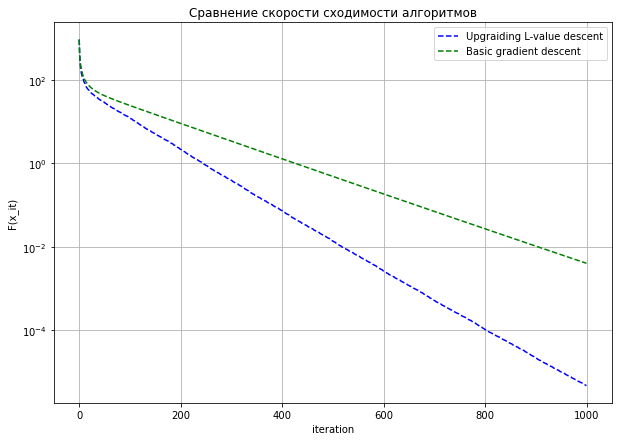

In [155]:
fig, ax = plt.subplots()
s = np.arange(0, 1000, 1)
ax.plot(s,  res_array_1, '--', color = 'blue', label='Upgraiding L-value descent')
ax.plot(s,  res_array_2, '--', color = 'green', label='Basic gradient descent')
ax.grid()
ax.legend()
ax.set_yscale('log')
ax.set(xlabel='iteration', ylabel='F(x_it)',
       title='Сравнение скорости сходимости алгоритмов')
fig.set_figheight(7)
fig.set_figwidth(10)

In [123]:
L = L0
x_cur = x0

In [ ]:
for i in trange(100):
    if L > 2*mu:
        L = L/2
    y0 = np.zeros(A.shape[0])
    x_next = optimize.minimize(func, y0, args=(x_cur, L)).x
    print(F(x_cur), F(x_next))
    while F(x_next) >= (F(x_cur) +  grad(x_cur) @ (x_next - x_cur) + L/2 * ((x_next - x_cur)**2).sum()):
        L = 2*L
        x_next = optimize.minimize(func, y0, args=(x_cur, L)).x
    x_cur = x_next
    print(F(x_cur))
min_2 = x_cur

In [ ]:
print(F(x0), F(min_2))